In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
life_df = pd.read_csv('Life_Expectancy_Data.csv')
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
#Create a new dataset to work with
new_df = pd.DataFrame({'country': life_df['Country'],
                        'life_expectancy': life_df['Life expectancy '],
                        'alcohol': life_df['Alcohol'],
                        'hepatitisB': life_df['Hepatitis B'],
                        'measles': life_df['Measles '],
                        'bmi': life_df[' BMI '],
                        'polio': life_df['Polio'],
                        'diphtheria': life_df['Diphtheria '],
                        'hiv': life_df[' HIV/AIDS'],
                        'total_expenditure': life_df['Total expenditure'],
                        'gdp': life_df['GDP'],
                        'total_expenditure': life_df['Total expenditure'],
                        'thinness_till19': life_df[' thinness  1-19 years'],
                        })
refined_life_expect = new_df.to_csv(r'C:\Users\GILOR\Desktop\data_science\Flatiron_projects\Life_Expectancy_Project\refined_life_expect.csv')

In [ ]:
df = pd.read_csv('refined_life_expect.csv')
df.head()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


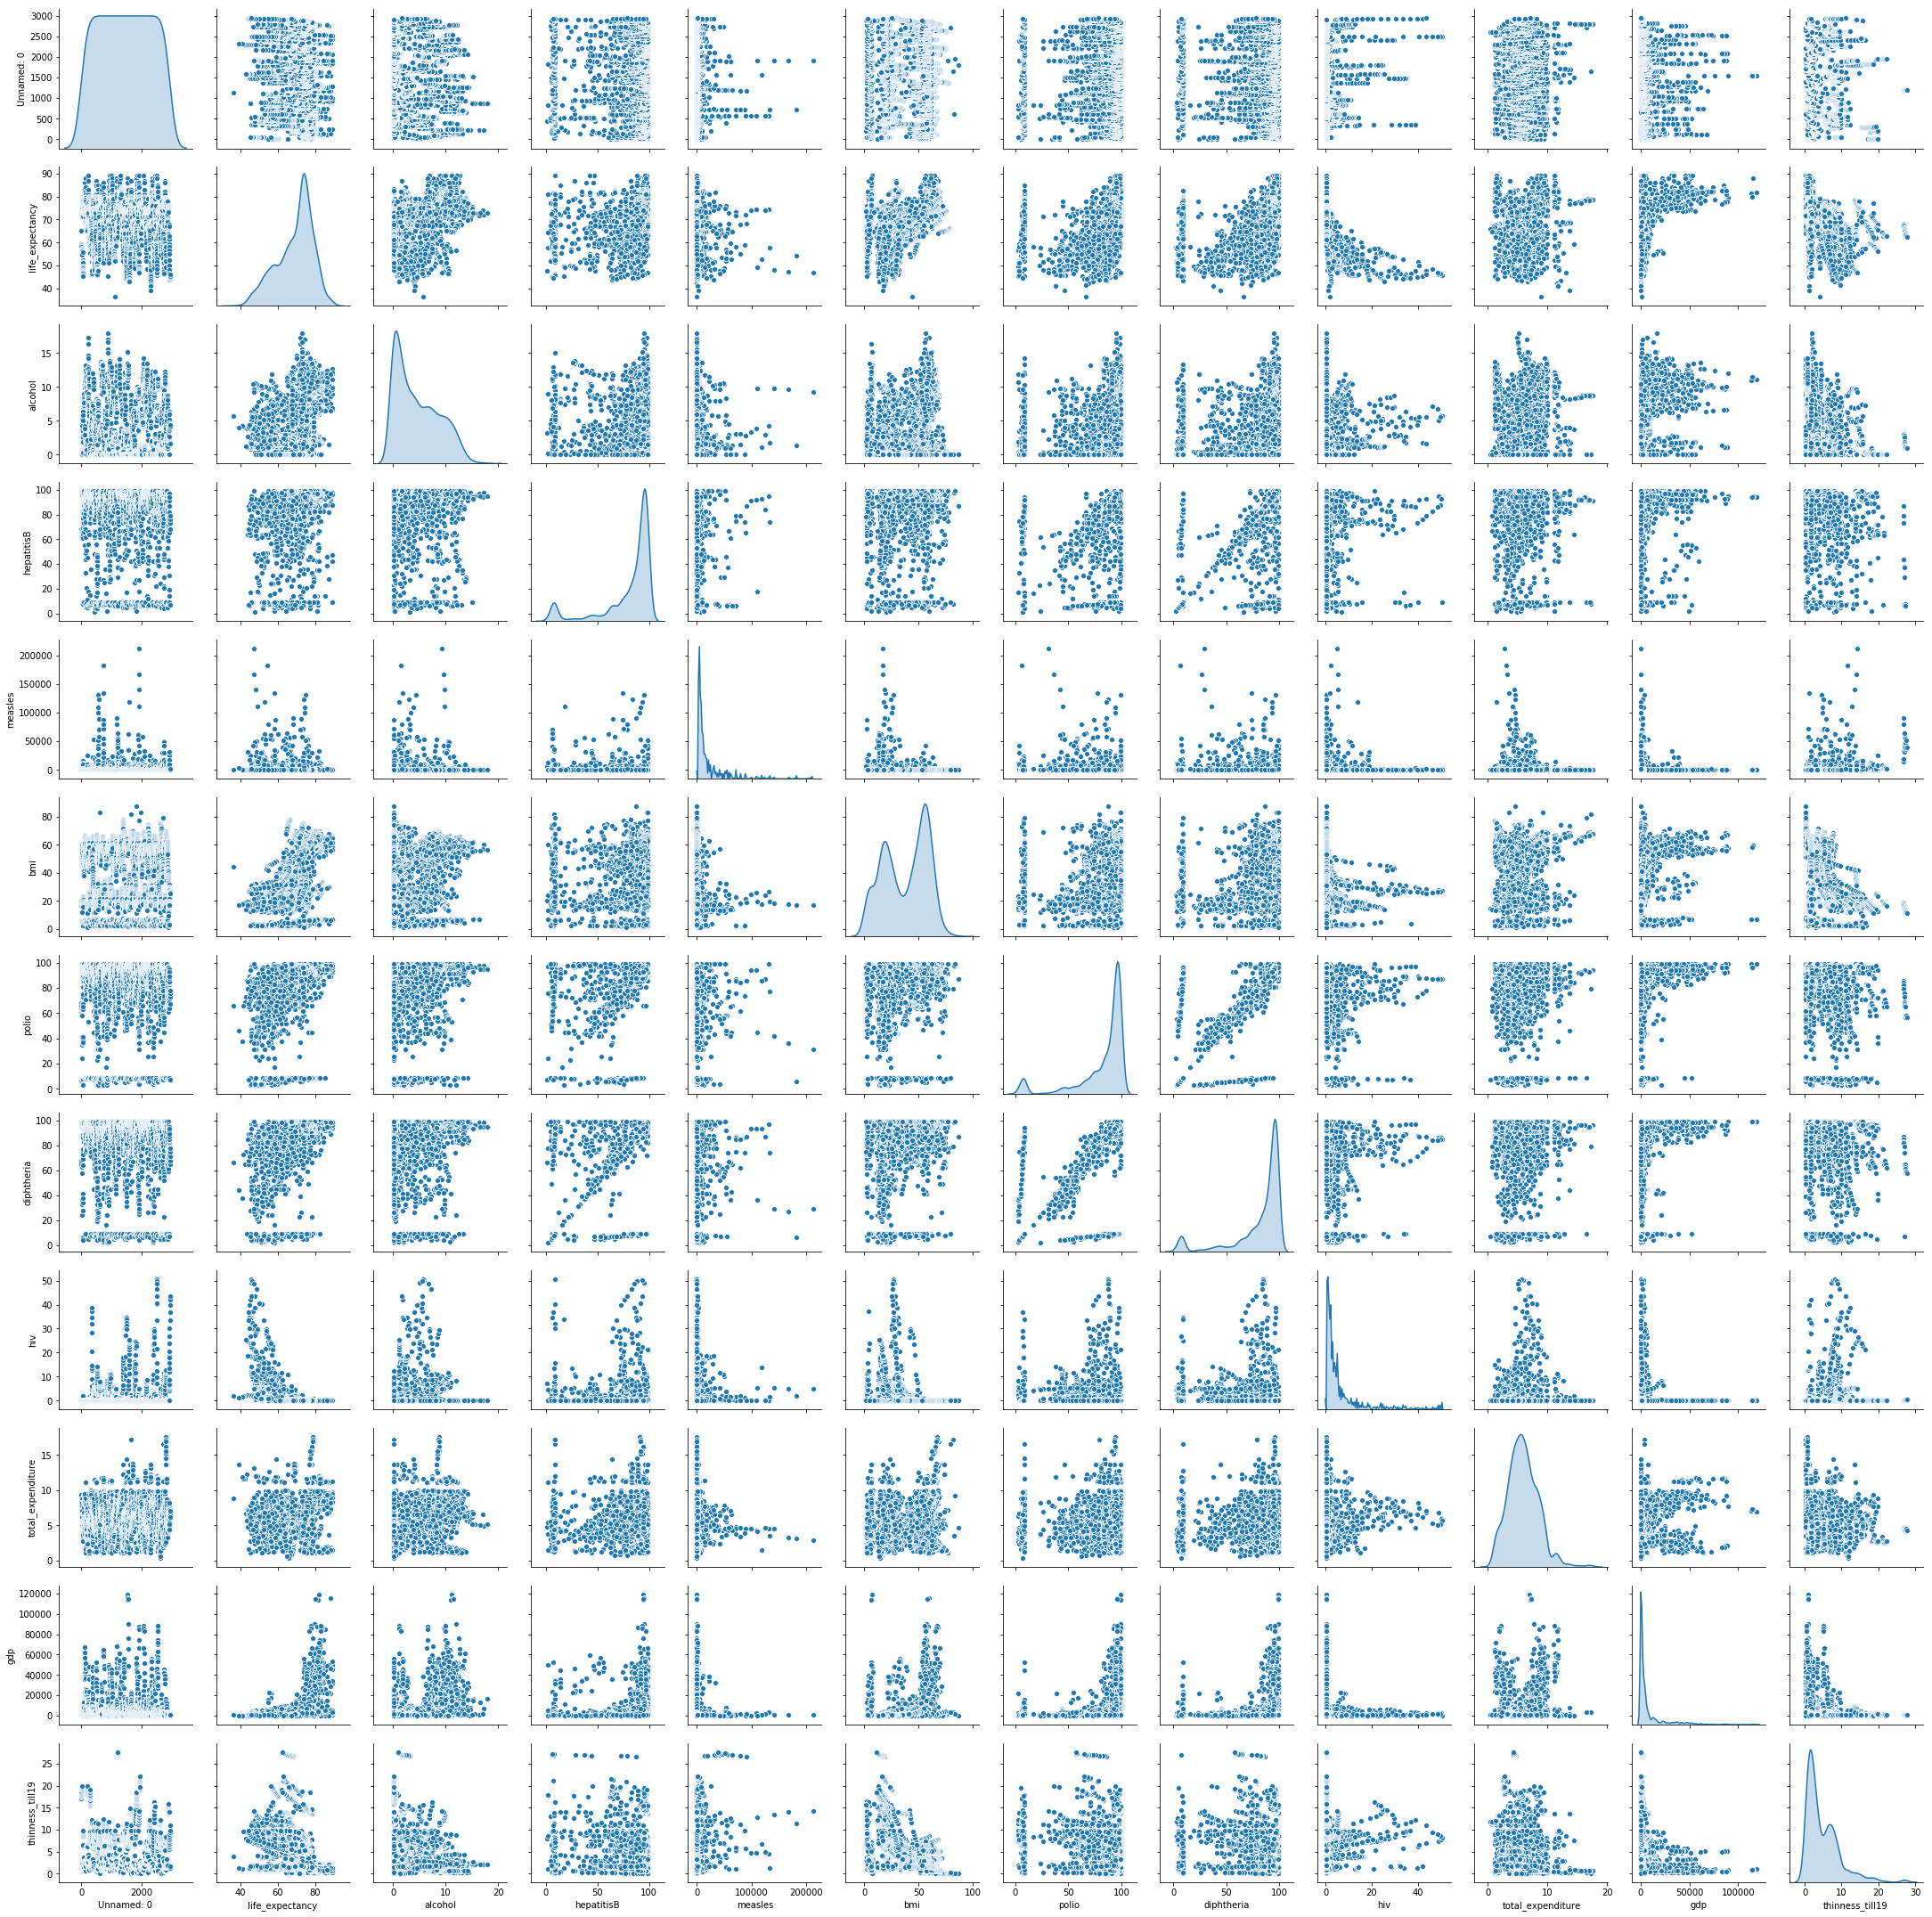

In [6]:
sns.pairplot(df, diag_kind="kde", height=2.5)

In [19]:
df.shape

(2928, 13)

In [21]:
dfdropped=df.dropna()

In [22]:
dfdropped.shape

(1853, 13)

In [8]:
lr_model = ols(formula='life_expectancy~C(country)+alcohol+hepatitisB+bmi+diphtheria+hiv+total_expenditure+gdp+thinness_till19+polio+measles', data=df).fit()
lr_model.summary()

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:13:46   Log-Likelihood:                -3729.6
No. Observations:                1853   AIC:                             7773.
Df Residuals:                    1696   BIC:                             8641.
Df Model:                         156                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             57.3539      0.749     76.606      0.000      55.885      58.822
C(country)[T.Albania]                                                 16.3348      0.855     19.108      0.000      14.658      18.012
C(country)[T.Algeria]                                                 15.1301      0.836     18.103      0.000      13.491      16.769
C(country)[T.Angola]                                                  -5.6357      0.904     -6.233      0.000      -7.409      -3.862
C(country)[T.Antigua and Barbuda]                                     16.7765      0.874     19.186      0.000      15.061      18.492
C(country)[T.Argentina]                                               16.9501      0.921     18.407      0.000      15.144      18.756
C(country)[T.Armenia]                                                 14.5867      0.845     17.264      0.000      12.930      16.244
C(country)[T.Australia]                                               23.0021      0.953     24.124      0.000      21.132      24.872
C(country)[T.Austria]                                                 23.4087      0.955     24.505      0.000      21.535      25.282
C(country)[T.Azerbaijan]                                              12.3526      0.838     14.742      0.000      10.709      13.996
C(country)[T.Bahamas]                                              -5.247e-12   1.17e-12     -4.497      0.000   -7.53e-12   -2.96e-12
C(country)[T.Bahrain]                                                 16.3587      0.793     20.619      0.000      14.803      17.915
C(country)[T.Bangladesh]                                              11.7032      0.753     15.546      0.000      10.227      13.180
C(country)[T.Barbados]                                                16.2031      0.861     18.821      0.000      14.515      17.892
C(country)[T.Belarus]                                                 12.3903      0.956     12.961      0.000      10.515      14.265
C(country)[T.Belgium]                                                 22.7205      0.947     24.003      0.000      20.864      24.577
C(country)[T.Belize]                                                  10.8843      0.843     12.917      0.000       9.232      12.537
C(country)[T.Benin]                                                    0.0631      0.764      0.083      0.934      -1.436       1.562
C(country)[T.Bhutan]                                                   7.3864      0.699     10.563      0.000       6.015       8.758
C(country)[T.Bolivia (Plurinational State of)]                     -1.372e-11   1.35e-12    -10.194      0.000   

In [10]:
lr_model = ols(formula='life_expectancy~C(country)+alcohol+hepatitisB+bmi+diphtheria+hiv+total_expenditure+gdp+thinness_till19', data=df).fit()
lr_model.summary()
#removed polio - no effect on the model, removed measles didn't look like it had a significant effect

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     237.1
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:14:37   Log-Likelihood:                -3733.9
No. Observations:                1853   AIC:                             7778.
Df Residuals:                    1698   BIC:                             8634.
Df Model:                         154                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             57.2772      0.749     76.443      0.000      55.808      58.747
C(country)[T.Albania]                                                 16.3715      0.846     19.355      0.000      14.713      18.031
C(country)[T.Algeria]                                                 15.1697      0.829     18.302      0.000      13.544      16.795
C(country)[T.Angola]                                                  -5.6655      0.902     -6.279      0.000      -7.435      -3.896
C(country)[T.Antigua and Barbuda]                                     16.8148      0.866     19.408      0.000      15.116      18.514
C(country)[T.Argentina]                                               16.9904      0.912     18.622      0.000      15.201      18.780
C(country)[T.Armenia]                                                 14.6247      0.838     17.456      0.000      12.981      16.268
C(country)[T.Australia]                                               23.0248      0.947     24.316      0.000      21.168      24.882
C(country)[T.Austria]                                                 23.4474      0.950     24.691      0.000      21.585      25.310
C(country)[T.Azerbaijan]                                              12.3928      0.835     14.847      0.000      10.756      14.030
C(country)[T.Bahamas]                                               4.608e-09   2.72e-10     16.972      0.000    4.08e-09    5.14e-09
C(country)[T.Bahrain]                                                 16.4062      0.785     20.890      0.000      14.866      17.947
C(country)[T.Bangladesh]                                              11.6623      0.751     15.538      0.000      10.190      13.134
C(country)[T.Barbados]                                                16.2444      0.858     18.932      0.000      14.561      17.927
C(country)[T.Belarus]                                                 12.4274      0.950     13.080      0.000      10.564      14.291
C(country)[T.Belgium]                                                 22.7603      0.937     24.292      0.000      20.923      24.598
C(country)[T.Belize]                                                  10.9246      0.835     13.089      0.000       9.288      12.562
C(country)[T.Benin]                                                    0.1047      0.763      0.137      0.891      -1.392       1.601
C(country)[T.Bhutan]                                                   7.4337      0.697     10.664      0.000       6.066       8.801
C(country)[T.Bolivia (Plurinational State of)]                      1.108e-11   3.01e-12      3.688      0.000   

In [12]:
dfdropped=df.dropna(subset=['life_expectancy'], inplace=True)

In [16]:
df.shape

(2928, 13)

In [23]:
lr_model = ols(formula='life_expectancy~C(country)+alcohol+hepatitisB+bmi+diphtheria+hiv+total_expenditure+gdp+thinness_till19+polio+measles', data=dfdropped).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:37:05   Log-Likelihood:                -3729.6
No. Observations:                1853   AIC:                             7773.
Df Residuals:                    1696   BIC:                             8641.
Df Model:                         156                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 57.3539      0.749     76.606      0.000      55.885      58.822
C(country)[T.Albania]                     16.3348      0.855     19.108      0.000      14.658      18.012
C(country)[T.Algeria]                     15.1301      0.836     18.103      0.000      13.491      16.769
C(country)[T.Angola]                      -5.6357      0.904     -6.233      0.000      -7.409      -3.862
C(country)[T.Antigua and Barbuda]         16.7765      0.874     19.186      0.000      15.061      18.492
C(country)[T.Argentina]                   16.9501      0.921     18.407      0.000      15.144      18.756
C(country)[T.Armenia]                     14.5867      0.845     17.264      0.000      12.930      16.244
C(country)[T.Australia]                   23.0021      0.953     24.124      0.000      21.132      24.872
C(country)[T.Austria]                     23.4087      0.955     24.505      0.000      21.535      25.282
C(country)[T.Azerbaijan]                  12.3526      0.838     14.742      0.000      10.709      13.996
C(country)[T.Bahrain]                     16.3587      0.793     20.619      0.000      14.803      17.915
C(country)[T.Bangladesh]                  11.7032      0.753     15.546      0.000      10.227      13.180
C(country)[T.Barbados]                    16.2031      0.861     18.821      0.000      14.515      17.892
C(country)[T.Belarus]                     12.3903      0.956     12.961      0.000      10.515      14.265
C(country)[T.Belgium]                     22.7205      0.947     24.003      0.000      20.864      24.577
C(country)[T.Belize]                      10.8843      0.843     12.917      0.000       9.232      12.537
C(country)[T.Benin]                        0.0631      0.764      0.083      0.934      -1.436       1.562
C(country)[T.Bhutan]                       7.3864      0.699     10.563      0.000       6.015       8.758
C(country)[T.Bosnia and Herzegovina]      17.6415      0.883     19.984      0.000      15.910      19.373
C(country)[T.Botswana]                     3.8045      0.837      4.548      0.000       2.164       5.445
C(country)[T.Brazil]                      14.7540      0.858     17.200      0.000      13.072      16.436
C(country)[T.Brunei Darussalam]           16.8643      0.792     21.295      0.000      15.311      18.418
C(country)[T.Bulgaria]                    14.8365      0.918     16.170      0.000      13.037      16.636
C(country)[T.Burkina Faso]                -0.3243      0.850     -0.382      0.703      -1.991       1.342
C(country)[T.Burundi]                     -1.5121      0.813     -1.861      0.063      -3.106       0.082
C(country)[T.Cabo Verde]                  14.4831      0.784     18.467      0.000     